In [28]:
#Regularized Linear Regression Using Batch Gradient Descent and Stoachstic Gradient Descent

In [29]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#only for jupyter notebook
%matplotlib inline 

In [30]:
dataSet = 'data.xlsx'

In [31]:
#header = None states that there is no header row or else it would take first row of our data as header.
df = pd.read_excel(dataSet,sheet_name='Sheet1',header=None)

In [32]:
valueArray = df.to_numpy() #dataframe DF to numpyarray valueArray
m = valueArray.shape[0] # Number of training examples   numpyArray.shape = (no of rows,no of cols)
X = valueArray[0:,0:2] # Feature Vector [x1,x2] m*2 0: = 0,1,2 rows and 0:2 = 0,1 columns
X = np.insert(X,0,1,axis=1) # axis = 1 (every row insert 1 at 0 column) , Adding x0 = 1 in feature matrix m*3
y = valueArray[0:,2:] # Class label Vector [y]  0: = 0,1,2 rows and 2: = 2 column   y = m*1 matrix

In [33]:
#Normalization
X[0:,1:2] = (X[0:,1:2] - X[0:,1:2].mean())/(X[0:,1:2].std())
X[0:,2:] = (X[0:,2:] - X[0:,2:].mean())/(X[0:,2:].std())

In [34]:
def computeCostFunction(X,y,w):
    sum = 0.0
    for index in range(X.shape[0]):
        sum += (y[index][0] - (w[0][0] * X[index][0] + w[1][0] * X[index][1] + w[2][0] * X[index][2]))**2
    #adding sum of squares of weights multiplied by regularization parameter
    sum += regParameter*(w[1][0]**2 + w[2][0]**2)
    return 0.5 * (sum/m)

In [35]:
#Implementing Batch Gradient Descent

In [36]:
alpha = 0.13
iters = 100
costs = []
iterations = []
weight1 = []
weight2 = []
#Regularization
regParameter = 2
np.random.seed(5) 
w = np.random.rand(3,1) #Weight matrix with random values 3*1 matrix
print(w)

[[0.22199317]
 [0.87073231]
 [0.20671916]]


In [37]:
wts = []
for i in range(iters):
    #wj <- wj + for all points (h(x) - y)*xj
    w0 = w1 = w2 = sum0 = sum1 = sum2 = 0.0 # will hold new values of weights after weight update
    for xIndex in range(m):
        sum0 += (X[xIndex][0]*w[0][0] + X[xIndex][1]*w[1][0] + X[xIndex][2]*w[2][0] - y[xIndex][0])*X[xIndex][0]
        sum1 += (X[xIndex][0]*w[0][0] + X[xIndex][1]*w[1][0] + X[xIndex][2]*w[2][0] - y[xIndex][0])*X[xIndex][1]
        sum2 += (X[xIndex][0]*w[0][0] + X[xIndex][1]*w[1][0] + X[xIndex][2]*w[2][0] - y[xIndex][0])*X[xIndex][2]
    w[0][0] = (1 - alpha*regParameter/m) * w[0][0] - alpha*sum0/m
    w[1][0] = (1 - alpha*regParameter/m) * w[1][0] - alpha*sum1/m
    w[2][0] = (1 - alpha*regParameter/m) * w[2][0] - alpha*sum2/m
    cost = computeCostFunction(X,y,w)
    costs.append(cost)
    iterations.append(i+1)
    weight1.append(w1)
    weight2.append(w2)
    wts.append(w)

In [38]:
#RESULTS

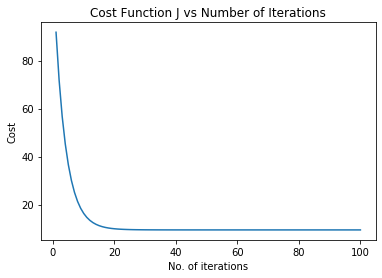

In [39]:
#2D - Plot of cost function vs number of iterations
plt.title('Cost Function J vs Number of Iterations')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(iterations,costs)
plt.show()

In [40]:
#3D surface plot of J vs w1 and w2

In [41]:
W_arr = np.array(wts)

In [42]:
res = 100
bounds = [2,0.6]
xx = np.linspace((np.min(W_arr[:,1])-bounds[0]), (np.max(W_arr[:,1])+bounds[0]), res)
yy = np.linspace(np.min(W_arr[:,2])-bounds[1], np.max(W_arr[:,2])+bounds[1]+1, res)
minw0 = W_arr[-1][0][0]

r = np.ndarray((res,res))
s = np.ndarray((res,res))
z = np.ndarray((res,res))

In [43]:
for i in range(res):
    for j in range(res):
        z[i][j] = computeCostFunction(X, y, np.array([minw0,xx[i],yy[j]]).reshape(-1,1))
        r[i][j] = xx[i]
        s[i][j] = yy[j]

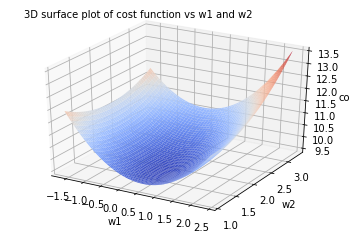

In [44]:
ax = plt.axes(projection='3d')
ax.plot_surface(r, s, z,cmap='coolwarm')
ax.text2D(0.05, 0.95, "3D surface plot of cost function vs w1 and w2", transform=ax.transAxes)
ax.set_xlabel("w1")
ax.set_ylabel("w2")
ax.set_zlabel("cost")
plt.show()

In [45]:
#Implementing Stochastic Gradient Descent

In [46]:
alpha = 0.69
iters = 1000
costs = []
iterations = []
weight1 = []
weight2 = []
batchSize = 30
#Regularization
regParameter = 0.012
np.random.seed(18) 
w = np.random.rand(3,1) #Weight matrix with random values 3*1 matrix
print(w)

[[0.65037424]
 [0.50545337]
 [0.87860147]]


In [47]:
def generateMiniBatch(X,y):
    data = np.hstack((X,y)) #X and y are combined row-wise
    np.random.shuffle(data)
    miniBatch = []
    for index in range(batchSize):
        miniBatch.append([data[index][0],data[index][1],data[index][2],data[index][3]])
    return miniBatch

In [48]:
#In each iteration take random 30 points from 'm' points and calculate gradient wrt each of the 30 points and update the weights
wts = []
for i in range(iters):
    w0 = w1 = w2 = grad0 = grad1 = grad2 = 0.0 # will hold new values of weights after weight update
    miniBatch = generateMiniBatch(X,y)
    X_mini = []
    y_mini = []
    for arr in miniBatch:
        X_mini.append([arr[0],arr[1],arr[2]])
        y_mini.append([arr[3]])
    for xIndex in range(batchSize):
        grad0 = (X_mini[xIndex][0]*w[0][0] + X_mini[xIndex][1]*w[1][0] + X_mini[xIndex][2]*w[2][0] - y_mini[xIndex][0])*X_mini[xIndex][0]
        grad1 = (X_mini[xIndex][0]*w[0][0] +X_mini[xIndex][1]*w[1][0] + X_mini[xIndex][2]*w[2][0] - y_mini[xIndex][0])*X_mini[xIndex][1]
        grad2 = (X_mini[xIndex][0]*w[0][0] + X_mini[xIndex][1]*w[1][0] + X_mini[xIndex][2]*w[2][0] - y_mini[xIndex][0])*X_mini[xIndex][2]
        w[0][0] = (1 - alpha*regParameter/m)*w[0][0] - alpha*grad0/m
        w[1][0] = (1 - alpha*regParameter/m)*w[1][0] - alpha*grad1/m
        w[2][0] = (1 - alpha*regParameter/m)*w[2][0] - alpha*grad2/m
    cost = computeCostFunction(X,y,w)
    costs.append(cost)
    iterations.append(i+1)
    weight1.append(w1)
    weight2.append(w2)
    wts.append(w)

In [49]:
#RESULTS

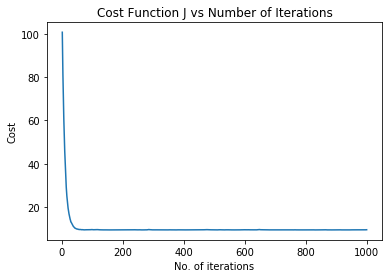

In [50]:
#2D - Plot of cost function vs number of iterations
plt.title('Cost Function J vs Number of Iterations')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(iterations,costs)
plt.show()

In [51]:
#3D Surface Graph of cost function vs w1 and w2

In [52]:
W_arr = np.array(wts)

In [53]:
res = 100
bounds = [2,0.6]
xx = np.linspace((np.min(W_arr[:,1])-bounds[0]), (np.max(W_arr[:,1])+bounds[0]), res)
yy = np.linspace(np.min(W_arr[:,2])-bounds[1], np.max(W_arr[:,2])+bounds[1]+1, res)
minw0 = W_arr[-1][0][0]

r = np.ndarray((res,res))
s = np.ndarray((res,res))
z = np.ndarray((res,res))

In [54]:
for i in range(res):
    for j in range(res):
        z[i][j] = computeCostFunction(X, y, np.array([minw0,xx[i],yy[j]]).reshape(-1,1))
        r[i][j] = xx[i]
        s[i][j] = yy[j]

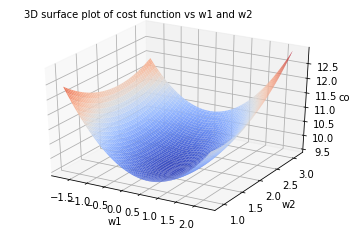

In [55]:
ax = plt.axes(projection='3d')
ax.plot_surface(r, s, z,cmap='coolwarm')
ax.text2D(0.05, 0.95, "3D surface plot of cost function vs w1 and w2", transform=ax.transAxes)
ax.set_xlabel("w1")
ax.set_ylabel("w2")
ax.set_zlabel("cost")
plt.show()